# PW IN MACHINE LEARNING

## Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

import warnings
warnings.filterwarnings('ignore')

## Load and explore data

Features (according to Kaggle competition description):
- ID -- the identifier of the data point (Test data set only)
- Win --"1" if the road team won, "0" of they lost (Train data set only)
- Month -- month of the gam
- Day -- day of the month of the gam
- Year -- year of the game
- Weekday -- weekday of the game
- Time -- time of the game
- RoadTeam -- the team that is playing the away game
- Locale -- this is a "bridge" relating the road team to the home team
- HomeTeam -- the team hosting the game
- Conference -- the conference of which both teams are members (ACC, Big 12, Big 10, Pac 12, Big East, SEC)
- RoadTeamPoints -- number of points scored by the road team
- OT -- number of overtime sessions required to determine winner. Blanks imply there was no overtime

In [47]:
# Load datasets
print("Loading dataset...")
train_df = pd.read_csv("Train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("Test.csv", encoding="ISO-8859-1")
print("Dataset loaded successfully.")

# Display the first few rows of the dataset
print("Displaying the first few rows of the dataset:")
train_df.head()

Loading dataset...
Dataset loaded successfully.
Displaying the first few rows of the dataset:


,Win,Month,Day,Year,Weekday,Time,RoadTeam,Locale,HomeTeam,Conference,RoadTeamPoints,OT
0,1,Jan,3,2018,Wed,9:00 pm/est,Missouri,@,South Carolina,SEC,79,NaN
1,0,Feb,10,2016,Wed,7:00 pm/est,Providence,@,Marquette,Big East,91,2OT
2,0,Jan,2,2016,Sat,2:00 pm/est,Tennessee,@,Auburn,SEC,77,NaN
3,0,Feb,3,2016,Wed,7:00 pm/est,Arkansas,@,Florida,SEC,83,NaN
4,1,Feb,18,2016,Thu,10:00 pm/est,Utah,@,UCLA,Pac-12,75,NaN


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Win             1893 non-null   int64 
 1   Month           1893 non-null   object
 2   Day             1893 non-null   int64 
 3   Year            1893 non-null   int64 
 4   Weekday         1893 non-null   object
 5   Time            1888 non-null   object
 6   RoadTeam        1893 non-null   object
 7   Locale          1893 non-null   object
 8   HomeTeam        1893 non-null   object
 9   Conference      1893 non-null   object
 10  RoadTeamPoints  1893 non-null   int64 
 11  OT              122 non-null    object
dtypes: int64(4), object(8)
memory usage: 177.6+ KB


In [49]:
train_df.describe(include='all')

,Win,Month,Day,Year,Weekday,Time,RoadTeam,Locale,HomeTeam,Conference,RoadTeamPoints,OT
count,1893.000000,1893,1893.000000,1893.000000,1893,1888,1893,1893,1893,1893,1893.000000,122
unique,NaN,4,NaN,NaN,7,34,75,1,393,6,NaN,4
top,NaN,Jan,NaN,NaN,Sat,7:00 pm/est,Xavier,@,North Carolina State,ACC,NaN,OT
freq,NaN,852,NaN,NaN,764,348,33,1893,32,382,NaN,95
mean,0.368727,NaN,15.014791,2016.479662,NaN,NaN,NaN,NaN,NaN,NaN,69.453249,NaN
std,0.482587,NaN,9.139672,1.131536,NaN,NaN,NaN,NaN,NaN,NaN,11.750604,NaN
min,0.000000,NaN,1.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN
25%,0.000000,NaN,7.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,NaN
50%,0.000000,NaN,14.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN
75%,1.000000,NaN,23.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN


### Data visualization

Distribuzione delle classi (%):
0    63.127311
1    36.872689
Name: Win, dtype: float64


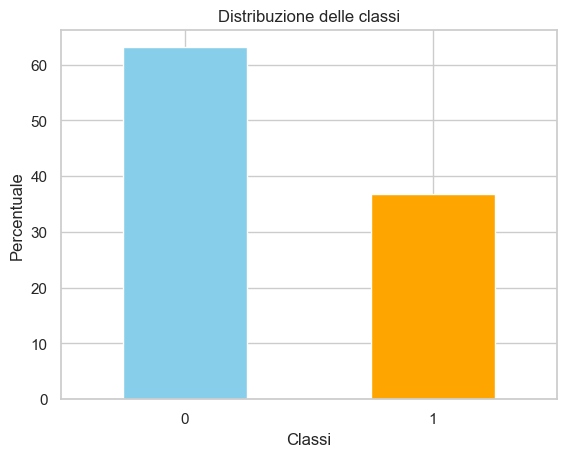

In [50]:
# Check classes balance
class_distribution = train_df['Win'].value_counts(normalize=True) * 100
print("Distribuzione delle classi (%):")
print(class_distribution)

class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribuzione delle classi")
plt.xlabel("Classi")
plt.ylabel("Percentuale")
plt.xticks(rotation=0)
plt.show()

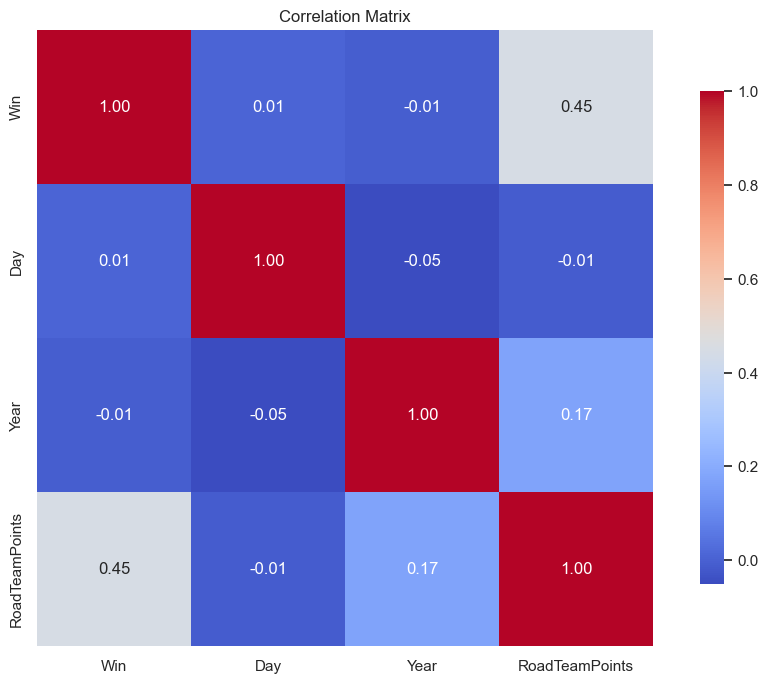

In [51]:
# Visualizza la matrice di correlazione per le feature numeriche
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

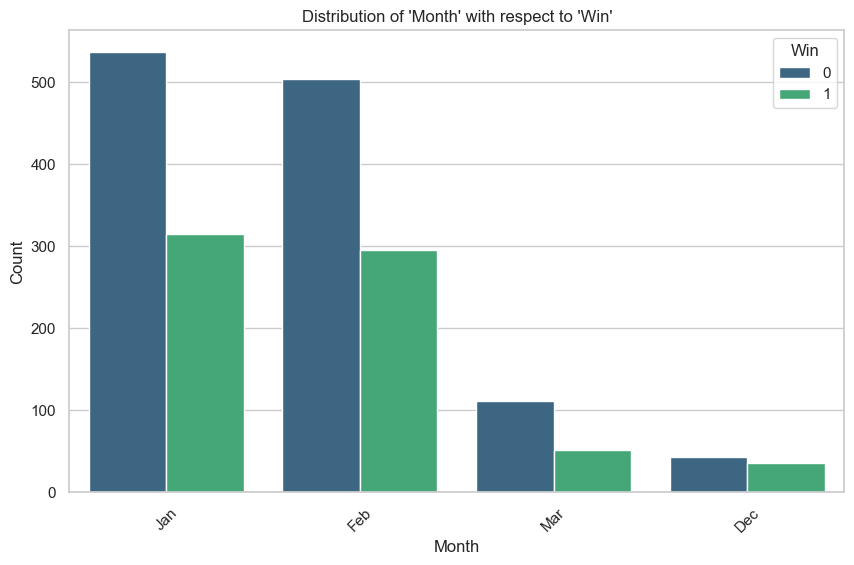

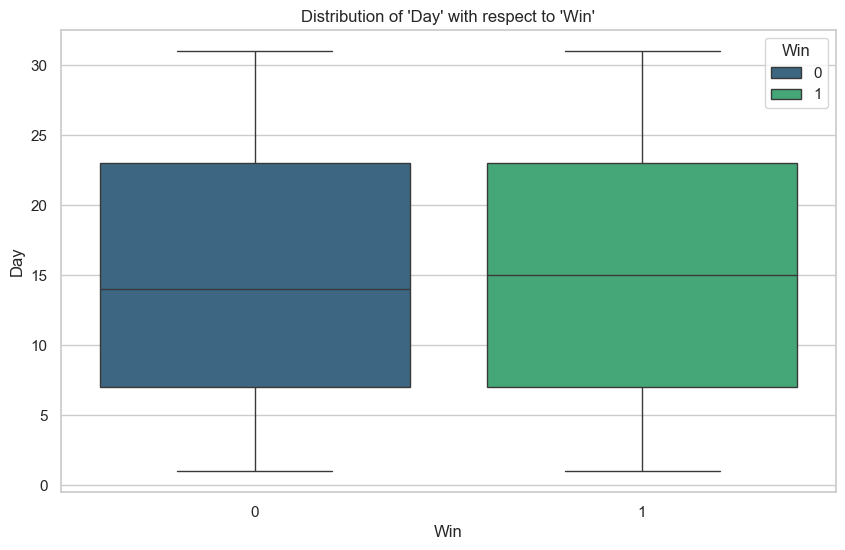

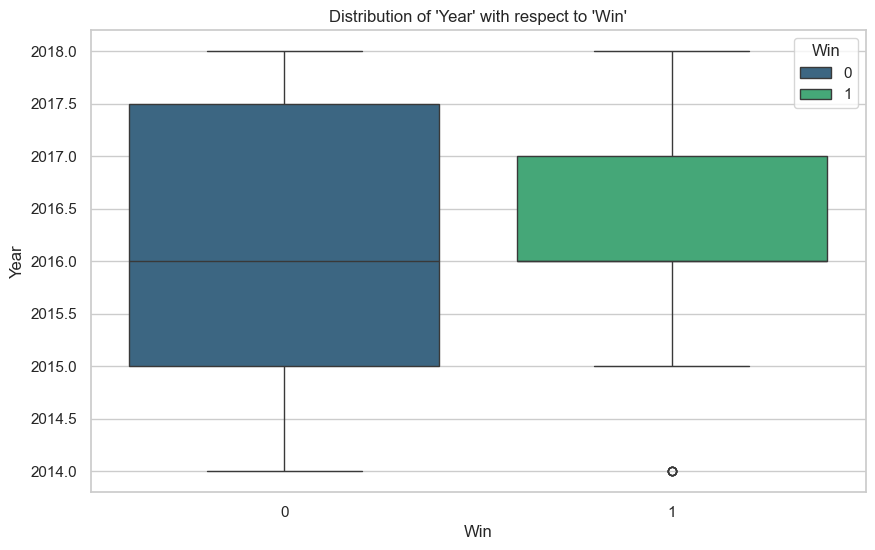

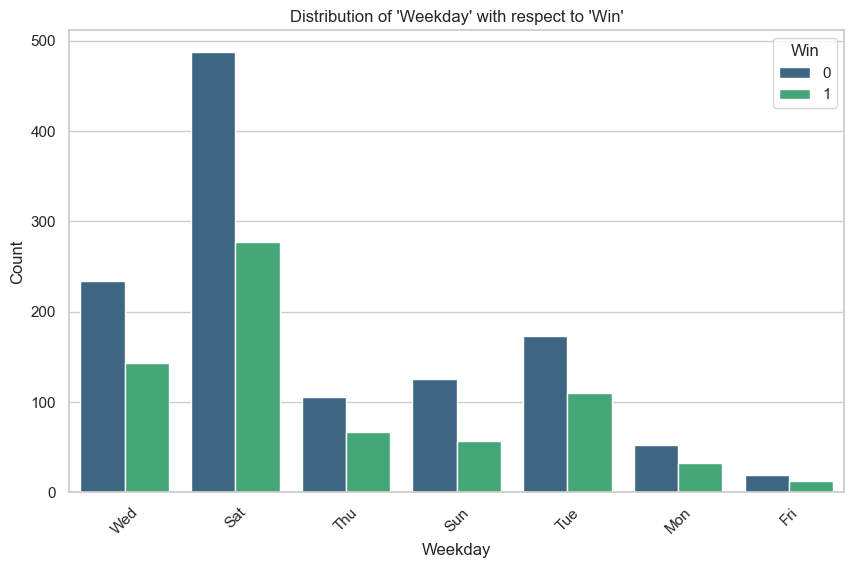

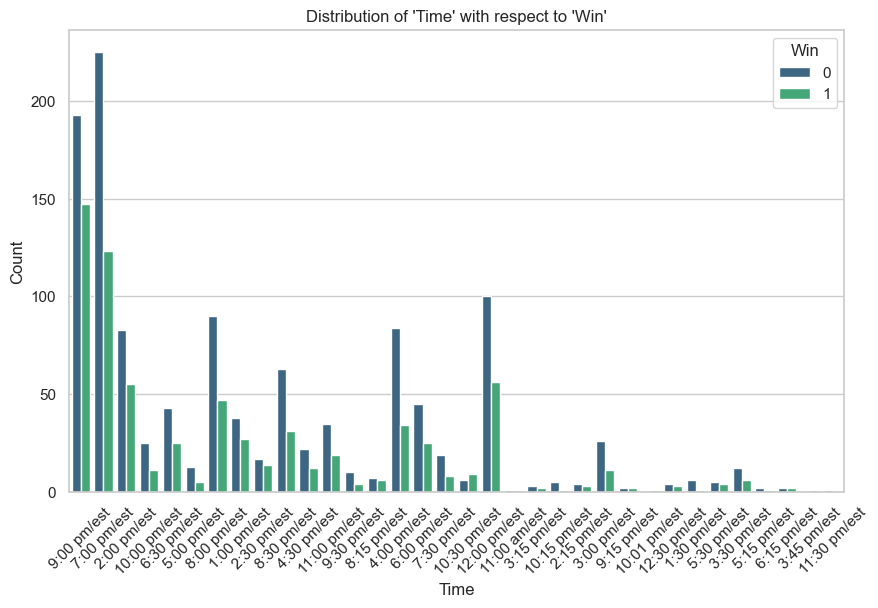

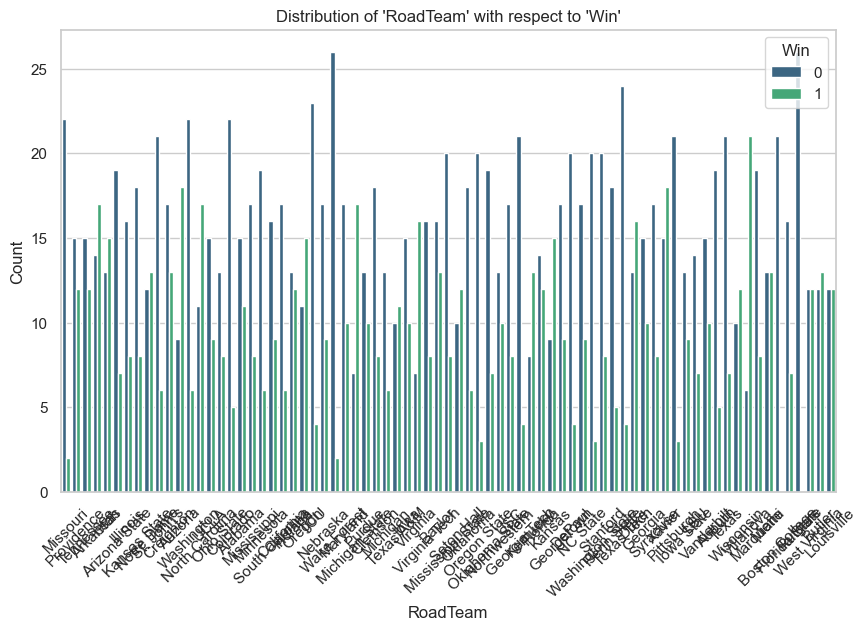

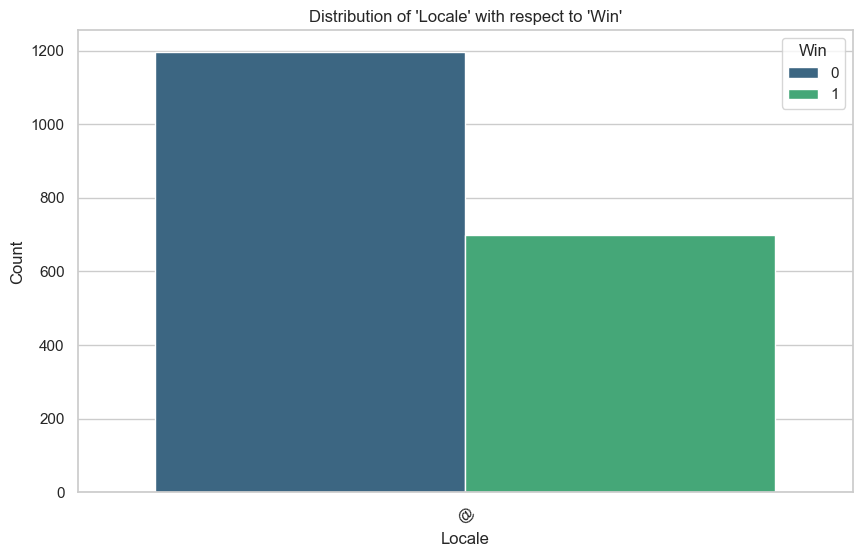

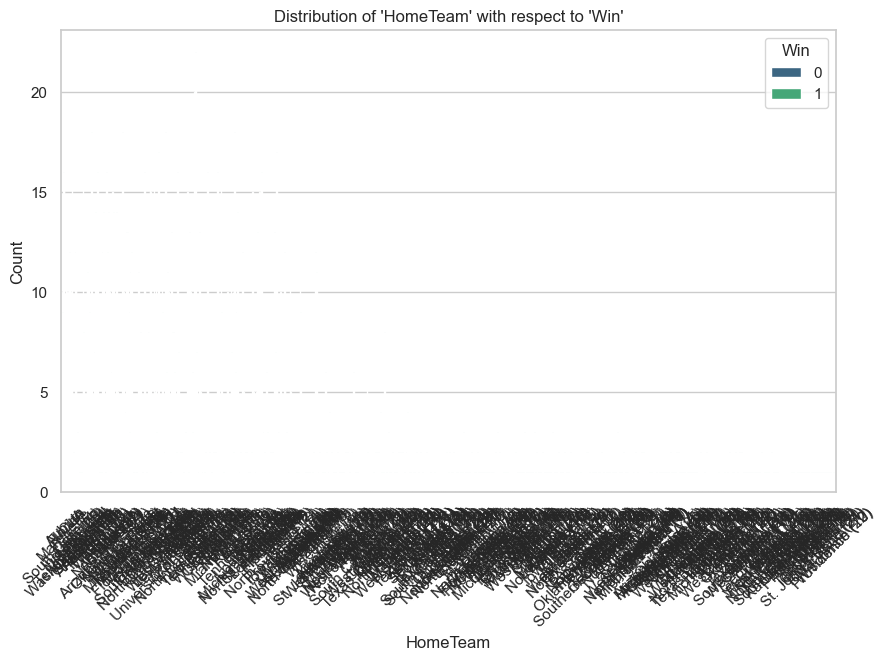

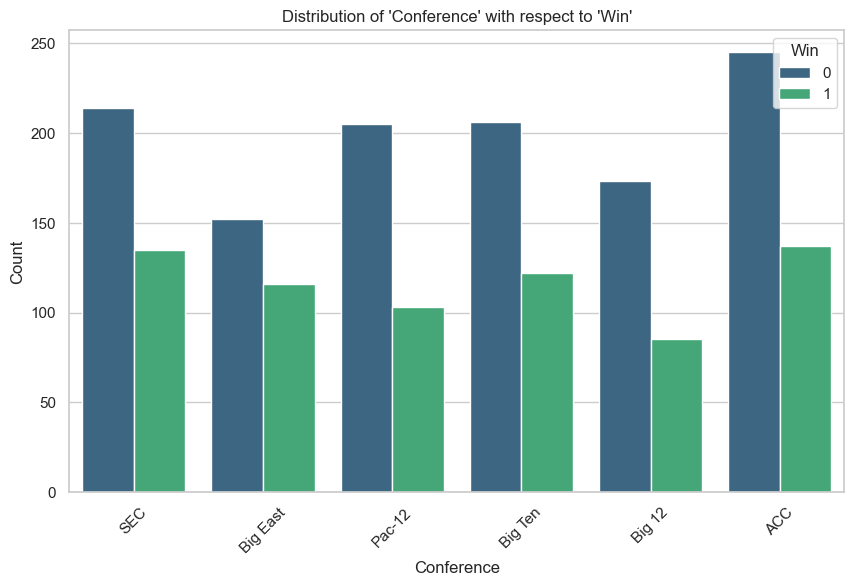

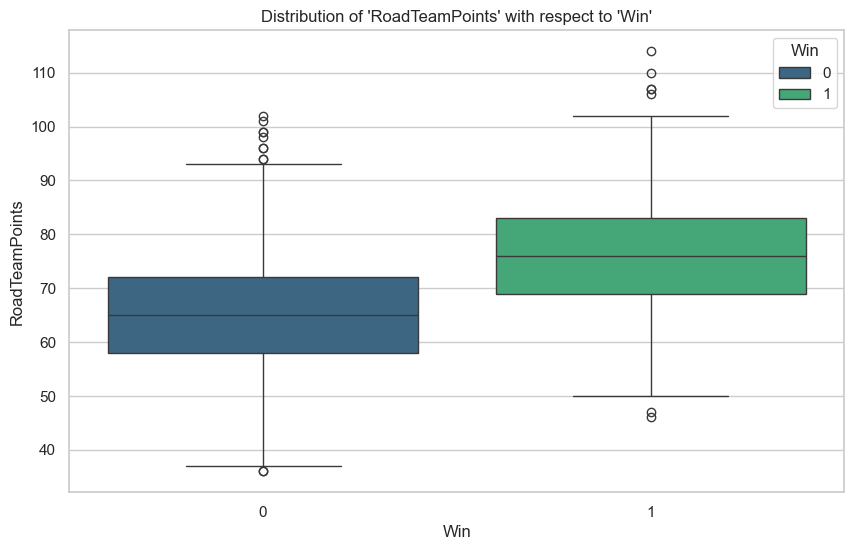

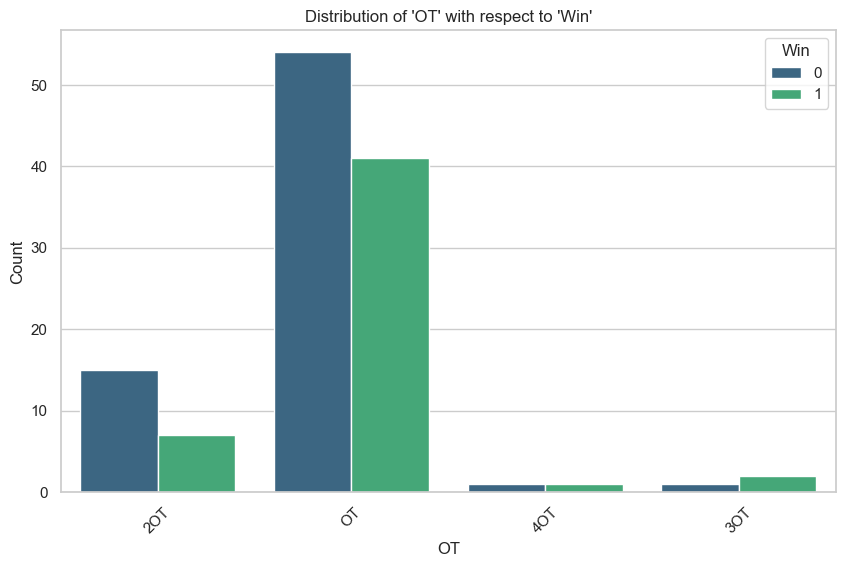

In [52]:
# Visualize the distribution of each feature with respect to the target variable 'Win'
for column in train_df.columns:
    if column != 'Win':  # Skip the target variable itself
        plt.figure(figsize=(10, 6))
        if train_df[column].dtype == 'object':  # Categorical features
            sns.countplot(data=train_df, x=column, hue='Win', palette='viridis')
            plt.title(f"Distribution of '{column}' with respect to 'Win'")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.legend(title="Win", loc='upper right')
        else:  # Numerical features
            sns.boxplot(data=train_df, x='Win', y=column, hue='Win', palette='viridis')
            plt.title(f"Distribution of '{column}' with respect to 'Win'")
            plt.xlabel("Win")
            plt.ylabel(column)
        plt.show()

From this initial exploration, we can have some interesting insights:

- The classes are not balanced (i.e. there are more Losses than Wins, specifically 2/3 are losses)
- The distribution of classes is pretty much the same wrt single features
- Most of the features are not numerical and need to be processed
- There are some missing values to handle (Time and OT columns)
- Some features do not seem very informative (Day, Weekday, Month, Locale)

## Data Preprocessing

Here we will:
- remove some rows with missing values
- drop duplicates
- fill missing value with placeholder in columns that have many missing
- drop unnecessary columns

then:
- encode some categorical features with OHE
- encode some other categorical features with LabelEncoder
- scale numerical features with MinMaxScaler

In [53]:
print("Shape of train_df:")
print(f"Elements: {train_df.shape[0]}, Features: {train_df.shape[1]}")
print("Columns in train_df:")
print(list(train_df.columns))

Shape of train_df:
Elements: 1893, Features: 12
Columns in train_df:
['Win', 'Month', 'Day', 'Year', 'Weekday', 'Time', 'RoadTeam', 'Locale', 'HomeTeam', 'Conference', 'RoadTeamPoints', 'OT']


In [54]:
print("Shape of test_df:")
print(f"Elements: {test_df.shape[0]}, Features: {test_df.shape[1]}")
print("Columns in test_df:")
print(list(test_df.columns))

Shape of test_df:
Elements: 812, Features: 12
Columns in test_df:
['ID', 'Month', 'Day', 'Year', 'Weekday', 'Time', 'RoadTeam', 'Locale', 'HomeTeam', 'Conference', 'RoadTeamPoints', 'OT']


In [55]:
# Check for missing values in the training dataset
print("Checking for missing values in the training dataset...")
missing_values = train_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Check for missing values in the test dataset
print("Checking for missing values in the test dataset...")
missing_values_test = test_df.isnull().sum()
print("Missing values in each column:")
print(missing_values_test[missing_values_test > 0])

Checking for missing values in the training dataset...
Missing values in each column:
Time       5
OT      1771
dtype: int64
Checking for missing values in the test dataset...
Missing values in each column:
Time      4
OT      752
dtype: int64


In [56]:
# Drop rows with missing 'Time' column
print("Dropping rows with missing 'Time' column")
train_df = train_df.dropna(subset=['Time'])
test_df = test_df.dropna(subset=['Time'])
print("Rows with missing 'Time' column dropped in trainset and testset.")

Dropping rows with missing 'Time' column
Rows with missing 'Time' column dropped in trainset and testset.


In [57]:
# Drop duplicates if any
print("Dropping duplicate entries...")
number_of_duplicates_train = train_df.shape[0] - len(train_df.drop_duplicates())
number_of_duplicates_test = test_df.shape[0] - len(test_df.drop_duplicates())
print(f"Number of duplicates in train_df: {number_of_duplicates_train}")
print(f"Number of duplicates in test_df: {number_of_duplicates_test}")
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
print("Duplicates removed.")

Dropping duplicate entries...
Number of duplicates in train_df: 5
Number of duplicates in test_df: 0
Duplicates removed.


In [58]:
# Handle missing values in OT column
print("Handling missing values...")
number_of_missing_train = train_df.isnull().sum().sum()
number_of_missing_test = test_df.isnull().sum().sum()
print(f"Number of OT missing values in train_df: {number_of_missing_train}")
print(f"Number of OT missing values in test_df: {number_of_missing_test}")
train_df = train_df.fillna("NOT") #Replace NaN values with the word "NOT" -> "No Over Time"
test_df = test_df.fillna("NOT")  
print("Missing values handled (filled with NOT).")

Handling missing values...
Number of OT missing values in train_df: 1762
Number of OT missing values in test_df: 748
Missing values handled (filled with NOT).


In [59]:
# Observe that 'Locale' column has the same value across all rows
if train_df['Locale'].nunique() == 1:
    print("'Locale' column has the same value across all rows. Dropping the column...")
    train_df = train_df.drop(columns=['Locale'])
    test_df = test_df.drop(columns=['Locale'])
    print("'Locale' column dropped.")
else:
    print("'Locale' column has different values. Not dropping the column.")

'Locale' column has the same value across all rows. Dropping the column...
'Locale' column dropped.


In [60]:
train_df.head()

,Win,Month,Day,Year,Weekday,Time,RoadTeam,HomeTeam,Conference,RoadTeamPoints,OT
0,1,Jan,3,2018,Wed,9:00 pm/est,Missouri,South Carolina,SEC,79,NOT
1,0,Feb,10,2016,Wed,7:00 pm/est,Providence,Marquette,Big East,91,2OT
2,0,Jan,2,2016,Sat,2:00 pm/est,Tennessee,Auburn,SEC,77,NOT
3,0,Feb,3,2016,Wed,7:00 pm/est,Arkansas,Florida,SEC,83,NOT
4,1,Feb,18,2016,Thu,10:00 pm/est,Utah,UCLA,Pac-12,75,NOT


In [61]:
test_df.drop(columns=['ID'], inplace=True)  # Drop 'ID' column from test_df
test_df.head()

,Month,Day,Year,Weekday,Time,RoadTeam,HomeTeam,Conference,RoadTeamPoints,OT
0,Feb,8,2017,Wed,6:30 pm/est,DePaul,Xavier (24),Big East,61,NOT
1,Jan,28,2016,Thu,7:00 pm/est,Notre Dame,Syracuse,ACC,66,NOT
2,Jan,23,2017,Mon,9:00 pm/est,Oklahoma,Texas,Big 12,83,NOT
3,Jan,10,2016,Sun,8:00 pm/est,NC State,Wake Forest,ACC,74,NOT
4,Feb,10,2016,Wed,6:30 pm/est,Butler,Seton Hall,Big East,81,NOT


In [62]:
# Drop unnecessary columns
columns_to_drop = ['Day', 'Month', 'Weekday']  # Columns to drop

# Drop unnecessary columns
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [63]:
# #apply correct encoding to Day, Month, Weekday columns

# # Map months to numbers: December = 12, January = 1, etc.
# month_map = {'Dec': 12, 'Jan': 1, 'Feb': 2, 'Mar': 3}
# train_df['month_num'] = train_df['Month'].map(month_map)

# train_df['month_sin'] = np.sin(2 * np.pi * train_df['month_num'] / 12)
# train_df['month_cos'] = np.cos(2 * np.pi * train_df['month_num'] / 12)

# # Map weekdays to numbers: Monday = 0, Tuesday = 1, ..., Sunday = 6
# train_df['day_sin'] = np.sin(2 * np.pi * train_df['Day'] / 31)
# train_df['day_cos'] = np.cos(2 * np.pi * train_df['Day'] / 31)

# # Map weekdays to numbers: Monday = 0, Tuesday = 1, ..., Sunday = 6
# train_df['Weekday'] = train_df['Weekday'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
# # Create sine and cosine features for the 'Weekday' column
# # Assuming 0 = Monday, 6 = Sunday
# train_df['dayweek_sin'] = np.sin(2 * np.pi * train_df['Weekday'] / 7)
# train_df['dayweek_cos'] = np.cos(2 * np.pi * train_df['Weekday'] / 7)


# # Drop the original 'Day', 'Month', and 'Weekday' columns
# train_df.drop(columns=['Day', 'Month', 'Weekday', 'month_num'], inplace=True)

# # Apply the same transformations to the test set
# test_df['month_num'] = test_df['Month'].map(month_map)
# test_df['month_sin'] = np.sin(2 * np.pi * test_df['month_num'] / 12)
# test_df['month_cos'] = np.cos(2 * np.pi * test_df['month_num'] / 12)
# test_df['day_sin'] = np.sin(2 * np.pi * test_df['Day'] / 31)
# test_df['day_cos'] = np.cos(2 * np.pi * test_df['Day'] / 31)
# test_df['Weekday'] = test_df['Weekday'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
# # Create sine and cosine features for the 'Weekday' column
# test_df['dayweek_sin'] = np.sin(2 * np.pi * test_df['Weekday'] / 7)
# test_df['dayweek_cos'] = np.cos(2 * np.pi * test_df['Weekday'] / 7)

# # Drop the original 'Day', 'Month', and 'Weekday' columns
# test_df.drop(columns=['Day', 'Month', 'Weekday', 'month_num'], inplace=True)


In [64]:
# One-Hot Encode categorical features
categorical_cols = ['RoadTeam', 'HomeTeam']

#Format rows to remove special characters (present in HomeTeam column)
test_df['HomeTeam'] = test_df['HomeTeam'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()
train_df['HomeTeam'] = train_df['HomeTeam'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()

print("Applying One-Hot Encoding to categorical features...")
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align train and test datasets to ensure they have the same columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)
if 'Win' in test_df.columns:
    test_df.drop(columns=['Win'], inplace=True)
print("One-Hot Encoding applied successfully.")

Applying One-Hot Encoding to categorical features...
One-Hot Encoding applied successfully.


In [65]:
# Extract hour from 'Time' column
def process_time_column(df):
        df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p/%Z', errors='coerce').dt.hour
        # df['AM'] = df['Time'].str.contains('am').astype(int)
        return df

train_df = process_time_column(train_df)
test_df = process_time_column(test_df)

# Drop the original 'Time' column
train_df.drop(columns=['Time'], inplace=True)
test_df.drop(columns=['Time'], inplace=True)

In [66]:
# train_df.head()

In [67]:
# test_df.head()

In [68]:
# Apply Label Encoding to the 'OT' column
print("Applying Label Encoding to the 'OT' and 'Conference' columns...")
le_ot = LabelEncoder()
train_df['OT'] = le_ot.fit_transform(train_df['OT'])
test_df['OT'] = le_ot.transform(test_df['OT'])


le_conference = LabelEncoder()
train_df['Conference'] = le_conference.fit_transform(train_df['Conference'])
test_df['Conference'] = le_conference.transform(test_df['Conference'])
print("Label Encoding applied successfully.")

Applying Label Encoding to the 'OT' and 'Conference' columns...
Label Encoding applied successfully.


In [69]:
# # Apply standard scaling to Hour column
# print("Applying Standard Scaling to 'Hour' column...")
# scaler = StandardScaler()
# train_df['Hour'] = scaler.fit_transform(train_df[['Hour']])
# test_df['Hour'] = scaler.transform(test_df[['Hour']])
# print("Standard Scaling applied successfully.")

In [70]:
# Apply min-max scaling to Hour column
scaler = MinMaxScaler()
train_df['Hour'] = scaler.fit_transform(train_df[['Hour']])
test_df['Hour'] = scaler.transform(test_df[['Hour']])
print("Min-Max Scaling applied successfully.")

Min-Max Scaling applied successfully.


In [71]:
# #apply standard scaler RoadTeamPoints column
# print("Applying Standard Scaler to RoadTeamPoints column...")
# numerical_cols = ['RoadTeamPoints']
# scaler = StandardScaler()
# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
# test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])
# print("Standard Scaler applied successfully.")

In [72]:
# # Apply min-max scaling to RoadTeamPoints column
# scaler = MinMaxScaler()
# train_df['RoadTeamPoints'] = scaler.fit_transform(train_df[['RoadTeamPoints']])
# test_df['RoadTeamPoints'] = scaler.transform(test_df[['RoadTeamPoints']])
# print("Min-Max Scaling applied successfully.")

In [73]:
# Convert Year to relative age
train_df['Year'] = train_df['Year'].max() - train_df['Year']
test_df['Year'] = test_df['Year'].max() - test_df['Year']

scaler = MinMaxScaler()
# scaler = StandardScaler()
train_df['Year'] = scaler.fit_transform(train_df[['Year']])
test_df['Year'] = scaler.transform(test_df[['Year']])

In [74]:
# train_df.drop(columns=['Year'], inplace=True)
# test_df.drop(columns=['Year'], inplace=True)

train_df.drop(columns=['Hour'], inplace=True)  
test_df.drop(columns=['Hour'], inplace=True)

print("Year and hour columns dropped successfully.")

Year and hour columns dropped successfully.


In [75]:
print("Final shape of train_df:")
print(f"Elements: {train_df.shape[0]}, Features: {train_df.shape[1]}")
# print("Final shape of test_df:")
# print(f"Elements: {test_df.shape[0]}, Features: {test_df.shape[1]}")

train_df.head()

Final shape of train_df:
Elements: 1883, Features: 153


,Win,Year,Conference,RoadTeamPoints,OT,RoadTeam_Arizona,RoadTeam_Arizona State,RoadTeam_Arkansas,RoadTeam_Auburn,RoadTeam_Baylor,...,HomeTeam_Vanderbilt,HomeTeam_Villanova,HomeTeam_Virginia,HomeTeam_Virginia Tech,HomeTeam_Wake Forest,HomeTeam_Washington,HomeTeam_Washington State,HomeTeam_West Virginia,HomeTeam_Wisconsin,HomeTeam_Xavier
0,1,0.0,5,79,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.5,2,91,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.5,5,77,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.5,5,83,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.5,4,75,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
print("Final shape of test_df:")
print(f"Elements: {test_df.shape[0]}, Features: {test_df.shape[1]}")

test_df.head()

Final shape of test_df:
Elements: 808, Features: 152


,Year,Conference,RoadTeamPoints,OT,RoadTeam_Arizona,RoadTeam_Arizona State,RoadTeam_Arkansas,RoadTeam_Auburn,RoadTeam_Baylor,RoadTeam_Boston College,...,HomeTeam_Vanderbilt,HomeTeam_Villanova,HomeTeam_Virginia,HomeTeam_Virginia Tech,HomeTeam_Wake Forest,HomeTeam_Washington,HomeTeam_Washington State,HomeTeam_West Virginia,HomeTeam_Wisconsin,HomeTeam_Xavier
0,0.25,2,61,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.50,0,66,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.25,1,83,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.50,0,74,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,2,81,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train models

Here we create the train/val split, then we balance the classes with SMOTE, finally different models are trained and optimized (via GridSearch) and the results are visualized.

The validation set was used as Testset for this analysis, since we don't have the ground truth labels for the competition's official testset.

** only the result of optimized models is displayed, other experiments results can be found in the documentation; however, a classification report is generated for each model.

In [77]:
# Define features and target
print("Defining features and target variable...")
X = train_df.drop(columns=['Win'])
y = train_df['Win']
print("Features and target defined.")

Defining features and target variable...
Features and target defined.


In [78]:
# Applica SMOTE per bilanciare le classi
print("Applying SMOTE to balance the classes...")
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print("Classes balanced successfully.")

Applying SMOTE to balance the classes...
Classes balanced successfully.


In [79]:
# Try undersampling with RandomUnderSampler and NearMiss

# # Apply RandomUnderSampler
# print("Applying RandomUnderSampler to balance the classes...")
# rus = RandomUnderSampler(random_state=42)
# X, y = rus.fit_resample(X, y)
# print("Classes balanced successfully.")

# Apply NearMiss
# print("Applying NearMiss to balance the classes...")
# nm = NearMiss()
# X, y = nm.fit_resample(X, y)
# print("Classes balanced successfully.")

In [80]:
# Split into training and validation sets
test_size = 0.2  # Define the test size for validation set
print(f"Splitting dataset into training and validation sets (with size {test_size})...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
print("Data split completed.")

Splitting dataset into training and validation sets (with size 0.2)...
Data split completed.


In [81]:
# Define a Results dataframe to store results and a Best_model_results dataframe to store the best model results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])
best_model_results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])

### Random forest

In [82]:
# Train Random Forest Classifier
print("Training Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate model on validation set
print("Evaluating model on validation set...")
y_val_pred = model.predict(X_val)
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
# print(f"Validation Accuracy: {accuracy}\n")
print("Model evaluation complete.")

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
results_df = results_df.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}, ignore_index=True)

Training Random Forest model...
Model training complete.
Evaluating model on validation set...
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       231
           1       0.81      0.80      0.81       244

    accuracy                           0.80       475
   macro avg       0.80      0.80      0.80       475
weighted avg       0.80      0.80      0.80       475

Model evaluation complete.


### AdaBoost

In [83]:
# provare adaboost
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier
print("Training AdaBoost model...")
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate model on validation set
print("Evaluating model on validation set...")
y_val_pred = model.predict(X_val)

# print(f"Validation Accuracy: {accuracy}")
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
print("Model evaluation complete.")

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
results_df = results_df.append({
    'Model': 'AdaBoost',
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}, ignore_index=True)

Training AdaBoost model...
Model training complete.
Evaluating model on validation set...
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       231
           1       0.82      0.82      0.82       244

    accuracy                           0.81       475
   macro avg       0.81      0.81      0.81       475
weighted avg       0.81      0.81      0.81       475

Model evaluation complete.


### SVM

In [84]:
#SVM
from sklearn.svm import SVC
# Train SVM Classifier
print("Training SVM model...")
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")
# Evaluate model on validation set
print("Evaluating model on validation set...")
y_val_pred = model.predict(X_val)

# print(f"Validation Accuracy: {accuracy}")
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
print("Model evaluation complete.")

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
results_df = results_df.append({
    'Model': 'SVM',
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}, ignore_index=True)

Training SVM model...
Model training complete.
Evaluating model on validation set...
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       231
           1       0.81      0.78      0.79       244

    accuracy                           0.79       475
   macro avg       0.79      0.79      0.79       475
weighted avg       0.79      0.79      0.79       475

Model evaluation complete.


### XGBoost

In [85]:
#XGBoost
from xgboost import XGBClassifier
# Train XGBoost Classifier
print("Training XGBoost model...")
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")
# Evaluate model on validation set
print("Evaluating model on validation set...")
y_val_pred = model.predict(X_val)

# print(f"Validation Accuracy: {accuracy}")
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
print("Model evaluation complete.")

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
results_df = results_df.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}, ignore_index=True)

Training XGBoost model...
Model training complete.
Evaluating model on validation set...
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       231
           1       0.80      0.77      0.78       244

    accuracy                           0.78       475
   macro avg       0.78      0.78      0.78       475
weighted avg       0.78      0.78      0.78       475

Model evaluation complete.


### MLP

In [86]:
# multilinear perceptron
from sklearn.neural_network import MLPClassifier
# Train MLP Classifier
print("Training MLP model...")
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")
# Evaluate model on validation set
print("Evaluating model on validation set...")
y_val_pred = model.predict(X_val)

# print(f"Validation Accuracy: {accuracy}")
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
print("Model evaluation complete.")

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
results_df = results_df.append({
    'Model': 'MLP',
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}, ignore_index=True)

Training MLP model...
Model training complete.
Evaluating model on validation set...
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       231
           1       0.86      0.77      0.81       244

    accuracy                           0.82       475
   macro avg       0.82      0.82      0.82       475
weighted avg       0.82      0.82      0.82       475

Model evaluation complete.


## Optimize models

In [87]:
# grid search on random forest
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# Fit the grid search to the training data
print("Starting Grid Search for best parameters...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")
# Print the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)
# Train the best model on the entire training set
best_rf_model = grid_search.best_estimator_
print("Training the best model from Grid Search...")
best_rf_model.fit(X_train, y_train)
print("Best model training complete.")
# Evaluate the best model on the validation set
print("Evaluating the best Random Forest model on validation set...")
y_val_pred_best_rf = best_rf_model.predict(X_val)


print("Classification Report on Validation Set for best Random Forest model:")
print(classification_report(y_val, y_val_pred_best_rf))
print("Model evaluation complete.")

accuracy_best_rf = accuracy_score(y_val, y_val_pred_best_rf)
recall_best_rf = recall_score(y_val, y_val_pred_best_rf)
f1_best_rf = f1_score(y_val, y_val_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_val, y_val_pred_best_rf)
best_model_results_df = best_model_results_df.append({
    'Model': 'Best Random Forest',
    'Accuracy': accuracy_best_rf,
    'Recall': recall_best_rf,
    'F1 Score': f1_best_rf,
    'ROC AUC': roc_auc_best_rf
}, ignore_index=True)

cm_best_rf = confusion_matrix(y_val, y_val_pred_best_rf)

Starting Grid Search for best parameters...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Grid Search complete.
Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score:
0.7669959538997874
Training the best model from Grid Search...
Best model training complete.
Evaluating the best Random Forest model on validation set...
Classification Report on Validation Set for best Random Forest model:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       231
           1       0.80      0.78      0.79       244

    accuracy                           0.79       475
   macro avg       0.79      0.79      0.79       475
weighted avg       0.79      0.79      0.79       475

Model evaluation complete.


In [88]:
# grid search on adaboost
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42), cv=3, param_grid=param_grid, n_jobs=-1)
print("Starting Grid Search for best parameters...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")
print("Best parameters found:")
print(grid_search.best_params_)
print("Best score from Grid Search:")
print(grid_search.best_score_)

# Train the best model from Grid Search
best_adaboost_model = grid_search.best_estimator_
print("Training the best model from Grid Search...")
best_adaboost_model.fit(X_train, y_train)
print("Best model training complete.")

# Evaluate the best model on the validation set
print("Evaluating the best model on the validation set...")
y_val_pred_best = best_adaboost_model.predict(X_val)


print("Classification Report on Validation Set for best model:")
print(classification_report(y_val, y_val_pred_best))
print("Model evaluation complete.")

accuracy_best = accuracy_score(y_val, y_val_pred_best)
recall_best = recall_score(y_val, y_val_pred_best)
f1_best = f1_score(y_val, y_val_pred_best)
roc_auc_best = roc_auc_score(y_val, y_val_pred_best)
best_model_results_df = best_model_results_df.append({
    'Model': 'Best AdaBoost',
    'Accuracy': accuracy_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    'ROC AUC': roc_auc_best
}, ignore_index=True)

cm_best_adaboost = confusion_matrix(y_val, y_val_pred_best)

Starting Grid Search for best parameters...
Grid Search complete.
Best parameters found:
{'learning_rate': 0.01, 'n_estimators': 200}
Best score from Grid Search:
0.768581565247532
Training the best model from Grid Search...
Best model training complete.
Evaluating the best model on the validation set...
Classification Report on Validation Set for best model:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       231
           1       0.79      0.83      0.81       244

    accuracy                           0.80       475
   macro avg       0.80      0.80      0.80       475
weighted avg       0.80      0.80      0.80       475

Model evaluation complete.


In [89]:
# grid search on SVM
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
# Create a GridSearchCV object
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, n_jobs=-1, verbose=2)
print("Starting Grid Search for SVM...")
grid_search_svm.fit(X_train, y_train)
print("Grid Search for SVM complete.")
print("Best parameters found for SVM:")
print(grid_search_svm.best_params_)
print("Best cross-validation score for SVM:")
print(grid_search_svm.best_score_)
# Train the best model from Grid Search
best_svm_model = grid_search_svm.best_estimator_
print("Training the best SVM model from Grid Search...")
best_svm_model.fit(X_train, y_train)
print("Best SVM model training complete.")
# Evaluate the best model on the validation set
print("Evaluating the best SVM model on the validation set...")
y_val_pred_best_svm = best_svm_model.predict(X_val)


print("Classification Report on Validation Set for best SVM model:")
print(classification_report(y_val, y_val_pred_best_svm))
print("Model evaluation complete.")

accuracy_best_svm = accuracy_score(y_val, y_val_pred_best_svm)
recall_best_svm = recall_score(y_val, y_val_pred_best_svm)
f1_best_svm = f1_score(y_val, y_val_pred_best_svm)
roc_auc_best_svm = roc_auc_score(y_val, y_val_pred_best_svm)

best_model_results_df = best_model_results_df.append({
    'Model': 'Best SVM',
    'Accuracy': accuracy_best_svm,
    'Recall': recall_best_svm,
    'F1 Score': f1_best_svm,
    'ROC AUC': roc_auc_best_svm
}, ignore_index=True)

cm_best_svm = confusion_matrix(y_val, y_val_pred_best_svm)

Starting Grid Search for SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid Search for SVM complete.
Best parameters found for SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM:
0.7775403110231234
Training the best SVM model from Grid Search...
Best SVM model training complete.
Evaluating the best SVM model on the validation set...
Classification Report on Validation Set for best SVM model:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       231
           1       0.81      0.78      0.79       244

    accuracy                           0.79       475
   macro avg       0.79      0.79      0.79       475
weighted avg       0.79      0.79      0.79       475

Model evaluation complete.


In [90]:
# Grid search on XGBoost
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
print("Starting Grid Search for XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("Grid Search for XGBoost complete.")
print("Best parameters found for XGBoost:")
print(grid_search_xgb.best_params_)
print("Best cross-validation score for XGBoost:")
print(grid_search_xgb.best_score_)
# Train the best model from Grid Search
best_xgb_model = grid_search_xgb.best_estimator_
print("Training the best XGBoost model from Grid Search...")
best_xgb_model.fit(X_train, y_train)
print("Best XGBoost model training complete.")
# Evaluate the best model on the validation set
print("Evaluating the best XGBoost model on the validation set...")
y_val_pred_best_xgb = best_xgb_model.predict(X_val)


print("Classification Report on Validation Set for best XGBoost model:")
print(classification_report(y_val, y_val_pred_best_xgb))
print("Model evaluation complete.")

accuracy_best_xgb = accuracy_score(y_val, y_val_pred_best_xgb)
recall_best_xgb = recall_score(y_val, y_val_pred_best_xgb)
f1_best_xgb = f1_score(y_val, y_val_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_val, y_val_pred_best_xgb)

best_model_results_df = best_model_results_df.append({
    'Model': 'Best XGBoost',
    'Accuracy': accuracy_best_xgb,
    'Recall': recall_best_xgb,
    'F1 Score': f1_best_xgb,
    'ROC AUC': roc_auc_best_xgb
}, ignore_index=True)

cm_best_xgb = confusion_matrix(y_val, y_val_pred_best_xgb)


Starting Grid Search for XGBoost...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Grid Search for XGBoost complete.
Best parameters found for XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost:
0.7754331060318221
Training the best XGBoost model from Grid Search...
Best XGBoost model training complete.
Evaluating the best XGBoost model on the validation set...
Classification Report on Validation Set for best XGBoost model:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       231
           1       0.82      0.80      0.80       244

    accuracy                           0.80       475
   macro avg       0.80      0.80      0.80       475
weighted avg       0.80      0.80      0.80       475

Model evaluation complete.


In [91]:
# grid search on MLP
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
# Create a GridSearchCV object
grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=3, n_jobs=-1, verbose=2)
print("Starting Grid Search for MLP...")
grid_search_mlp.fit(X_train, y_train)
print("Grid Search for MLP complete.")
print("Best parameters found for MLP:")
print(grid_search_mlp.best_params_)
print("Best cross-validation score for MLP:")
print(grid_search_mlp.best_score_)
# Train the best model from Grid Search
best_mlp_model = grid_search_mlp.best_estimator_
print("Training the best MLP model from Grid Search...")
best_mlp_model.fit(X_train, y_train)
print("Best MLP model training complete.")
# Evaluate the best model on the validation set
print("Evaluating the best MLP model on the validation set...")
y_val_pred_best_mlp = best_mlp_model.predict(X_val)


print("Classification Report on Validation Set for best MLP model:")
print(classification_report(y_val, y_val_pred_best_mlp))
print("Model evaluation complete.")

accuracy_best_mlp = accuracy_score(y_val, y_val_pred_best_mlp)
recall_best_mlp = recall_score(y_val, y_val_pred_best_mlp)
f1_best_mlp = f1_score(y_val, y_val_pred_best_mlp)
roc_auc_best_mlp = roc_auc_score(y_val, y_val_pred_best_mlp)

best_model_results_df = best_model_results_df.append({
    'Model': 'Best MLP',
    'Accuracy': accuracy_best_mlp,
    'Recall': recall_best_mlp,
    'F1 Score': f1_best_mlp,
    'ROC AUC': roc_auc_best_mlp
}, ignore_index=True)

cm_best_mlp = confusion_matrix(y_val, y_val_pred_best_mlp)

Starting Grid Search for MLP...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Grid Search for MLP complete.
Best parameters found for MLP:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score for MLP:
0.7807073676351978
Training the best MLP model from Grid Search...
Best MLP model training complete.
Evaluating the best MLP model on the validation set...
Classification Report on Validation Set for best MLP model:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       231
           1       0.85      0.78      0.81       244

    accuracy                           0.82       475
   macro avg       0.82      0.82      0.82       475
weighted avg       0.82      0.82      0.82       475

Model evaluation complete.


In [92]:
print("Results DataFrame:")
results_df.head()

Results DataFrame:


,Model,Accuracy,Recall,F1 Score,ROC AUC
0,Random Forest,0.802105,0.803279,0.806584,0.802072
1,AdaBoost,0.812632,0.815574,0.817248,0.812549
2,SVM,0.789474,0.778689,0.791667,0.789777
3,XGBoost,0.783158,0.766393,0.784067,0.783630
4,MLP,0.816842,0.770492,0.812095,0.818146


In [93]:
print("Best Model Results DataFrame:")
best_model_results_df.head()

Best Model Results DataFrame:


,Model,Accuracy,Recall,F1 Score,ROC AUC
0,Best Random Forest,0.787368,0.778689,0.790021,0.787613
1,Best AdaBoost,0.797895,0.827869,0.808000,0.797051
2,Best SVM,0.789474,0.778689,0.791667,0.789777
3,Best XGBoost,0.802105,0.795082,0.804979,0.802303
4,Best MLP,0.816842,0.782787,0.814499,0.817800


In [94]:
# Save the results to CSV files
# results_df.to_csv('model_results.csv', index=False)
# best_model_results_df.to_csv('best_model_results.csv', index=False)
# print("Results saved to CSV files.")

## Visualize results

Results are visualized via Confusion Matrix (only for optimized models)

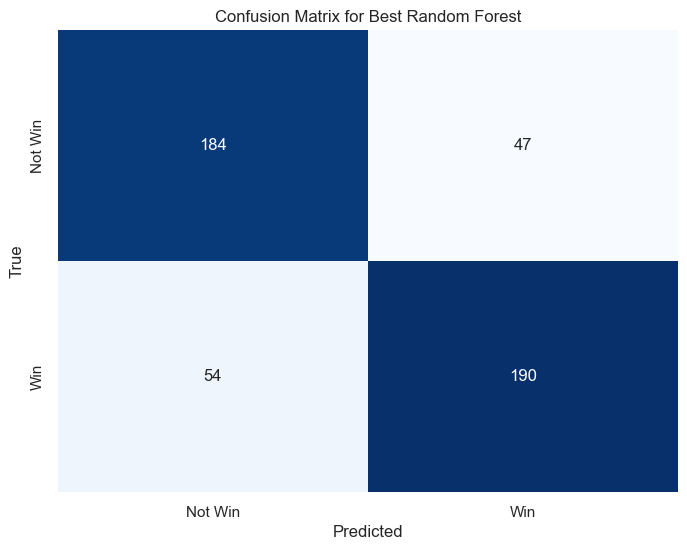

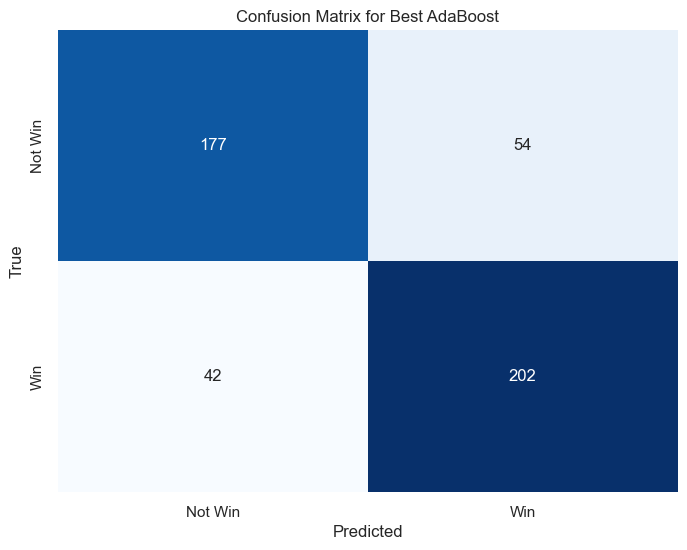

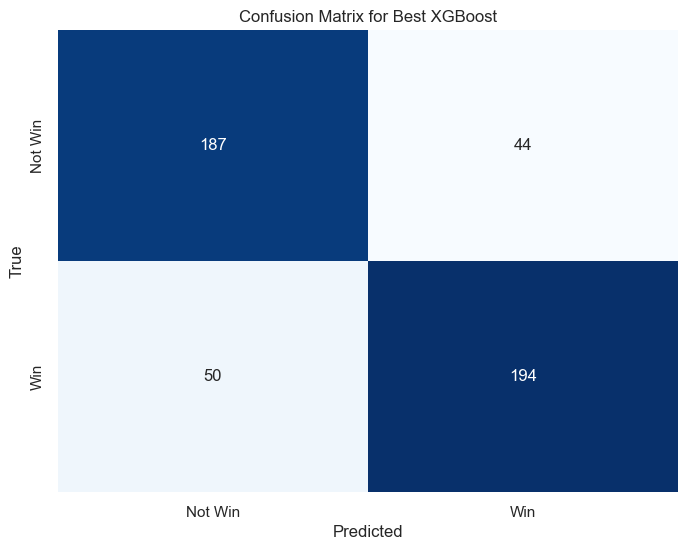

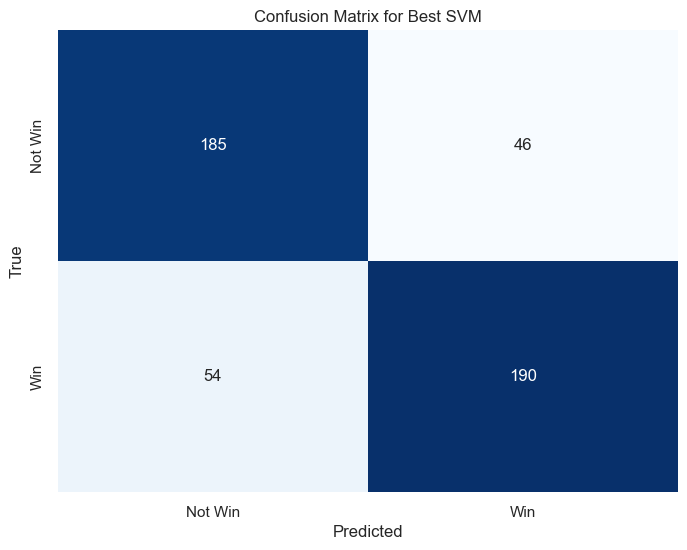

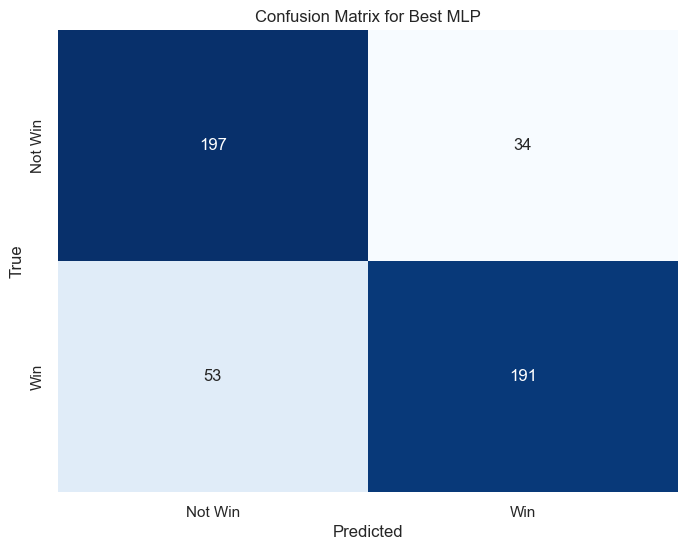

In [95]:
# Plot confusion matrix for best models
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for best Random Forest model
plot_confusion_matrix(cm_best_rf, 'Best Random Forest')
# Plot confusion matrix for best AdaBoost model
plot_confusion_matrix(cm_best_adaboost, 'Best AdaBoost')
# Plot confusion matrix for best XGBoost model
plot_confusion_matrix(cm_best_xgb, 'Best XGBoost')
# Plot confusion matrix for best SVM model
plot_confusion_matrix(cm_best_svm, 'Best SVM')
# Plot confusion matrix for best MLP model
plot_confusion_matrix(cm_best_mlp, 'Best MLP')



## Predict on testset (optional) 

Here a submission file for the Kaggle competition is generated, based on Testset prediction, for which we don't have the true labels.

In [96]:
# # Predict on test set
# print("Making predictions on test set...")
# # test_predictions = best_model.predict(test_df)
# test_predictions = model.predict(test_df)

# print("Predictions completed.")

In [97]:
# # Save predictions
# print("Saving predictions to submission.csv...")
# submission = pd.DataFrame({'Pred': test_predictions})
# submission.insert(0, 'ID', range(1, len(submission) + 1))
# submission.to_csv(f"submission.csv", index=False)
# print("Predictions saved successfully.")

### Create submission for competition

This code can be used to generate a submission file for the kaggle competition, given a model and a testset.

In this notebook, submission files for the optimized models are generated (remove the comments in order to download them)

In [98]:
def get_submission(model, data):
    print("Making predictions on test set...")
    test_predictions = model.predict(data)
    print("Predictions completed.")
    
    # Save predictions
    print("Saving predictions to submission.csv...")
    submission = pd.DataFrame({'Pred': test_predictions})
    submission.insert(0, 'ID', range(1, len(submission) + 1))
    submission.to_csv(f"submission_{model.__class__.__name__}.csv", index=False)
    print("Predictions saved successfully.")

def prepare_data_for_submission(test_df):
    test_df = test_df.fillna(method='ffill')
    test_df = test_df.fillna("NOT")  # Replace NaN values with the word "NOT"
    test_df = test_df.drop(columns=['Locale'])
    test_df.drop(columns=['ID'], inplace=True)  # Drop 'ID' column from test_df
    test_df.drop(columns=columns_to_drop, inplace=True)
    test_df['HomeTeam'] = test_df['HomeTeam'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()
    test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
    # Align train and test datasets to ensure they have the same columns
    # train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)
    if 'Win' in test_df.columns:
        test_df.drop(columns=['Win'], inplace=True)

    test_df = process_time_column(test_df)
    test_df.drop(columns=['Time'], inplace=True)

    test_df['OT'] = le_ot.transform(test_df['OT'])
    test_df['Conference'] = le_conference.transform(test_df['Conference'])

    scaler = MinMaxScaler()
    # train_df['Hour'] = scaler.transform(train_df[['Hour']])
    test_df['Hour'] = scaler.fit_transform(test_df[['Hour']])
    scaler = MinMaxScaler()
    # train_df['RoadTeamPoints'] = scaler.transform(train_df[['RoadTeamPoints']])
    test_df['RoadTeamPoints'] = scaler.fit_transform(test_df[['RoadTeamPoints']])
    # Convert Year to relative age
    train_df['Year'] = train_df['Year'].max() - train_df['Year']
    test_df['Year'] = test_df['Year'].max() - test_df['Year']

    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    # train_df['Year'] = scaler.fit_transform(train_df[['Year']])
    test_df['Year'] = scaler.fit_transform(test_df[['Year']])
    return test_df

In [99]:
# # Prepare test data for submission
# test_df = pd.read_csv("Test.csv", encoding="ISO-8859-1")
# test_df = prepare_data_for_submission(test_df)
# # Get submission for best model
# get_submission(best_rf_model, test_df)
# get_submission(best_adaboost_model, test_df)
# get_submission(best_xgb_model, test_df)
# get_submission(best_svm_model, test_df)
# get_submission(best_mlp_model, test_df)